In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV


In [2]:
df=pd.read_csv('Orange Quality Data.csv')
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [3]:
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [5]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [6]:
df.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')

In [7]:
df.shape

(241, 11)

In [8]:
df.nunique()

Size (cm)              41
Weight (g)            131
Brix (Sweetness)       82
pH (Acidity)           44
Softness (1-5)          9
HarvestTime (days)     22
Ripeness (1-5)          8
Color                   5
Variety                24
Blemishes (Y/N)        12
Quality (1-5)           8
dtype: int64

In [9]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


<Axes: xlabel='Quality (1-5)', ylabel='Weight (g)'>

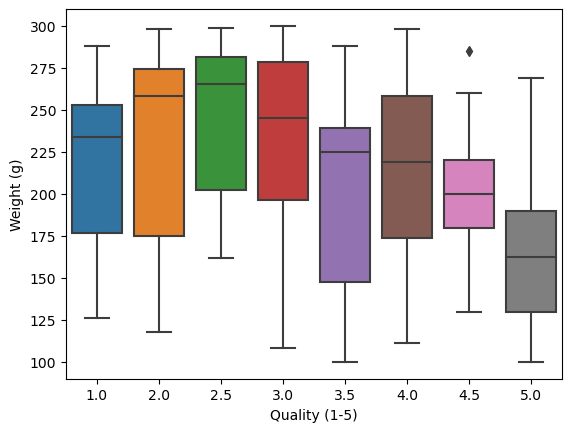

In [10]:
sns.boxplot(data=df,x='Quality (1-5)',y='Weight (g)')

<Axes: xlabel='Quality (1-5)', ylabel='Size (cm)'>

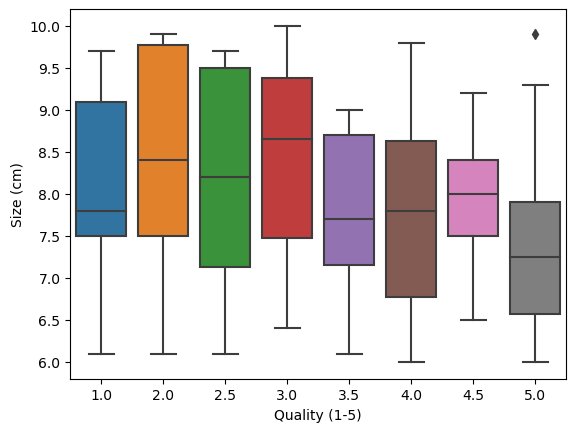

In [11]:
sns.boxplot(data=df,x='Quality (1-5)',y='Size (cm)')

<Axes: xlabel='Quality (1-5)', ylabel='Brix (Sweetness)'>

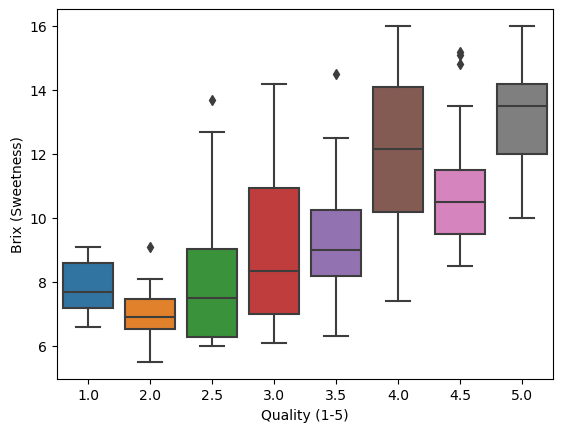

In [12]:
sns.boxplot(data=df,x='Quality (1-5)',y='Brix (Sweetness)')

<Axes: xlabel='Quality (1-5)', ylabel='pH (Acidity)'>

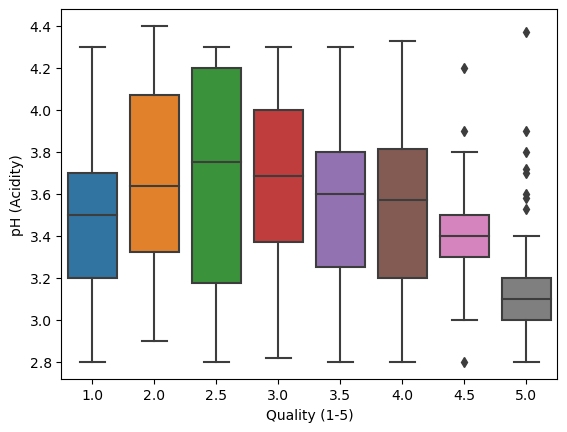

In [13]:
sns.boxplot(data=df,x='Quality (1-5)',y='pH (Acidity)')

<Axes: xlabel='Quality (1-5)', ylabel='Softness (1-5)'>

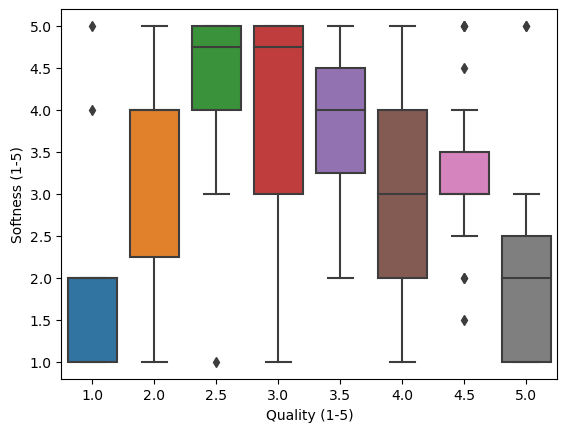

In [14]:
sns.boxplot(data=df,x='Quality (1-5)',y='Softness (1-5)')

<Axes: xlabel='Quality (1-5)', ylabel='HarvestTime (days)'>

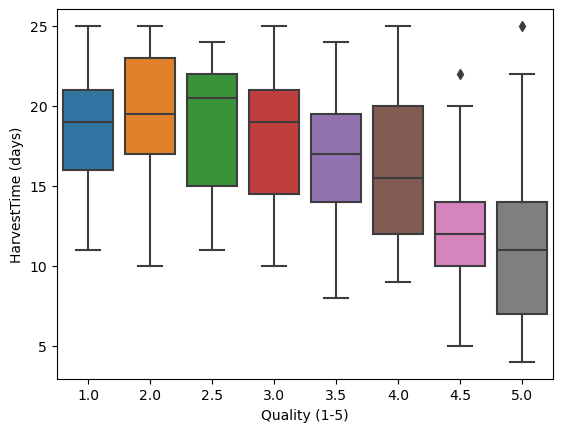

In [15]:

sns.boxplot(data=df,x='Quality (1-5)',y='HarvestTime (days)')

<Axes: xlabel='Quality (1-5)', ylabel='Ripeness (1-5)'>

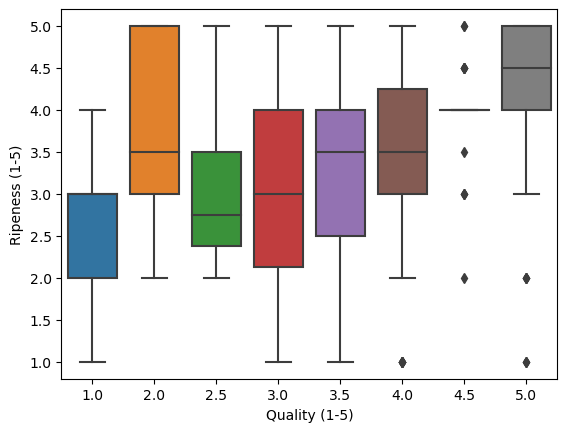

In [16]:
sns.boxplot(data=df,x='Quality (1-5)',y='Ripeness (1-5)')

In [17]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


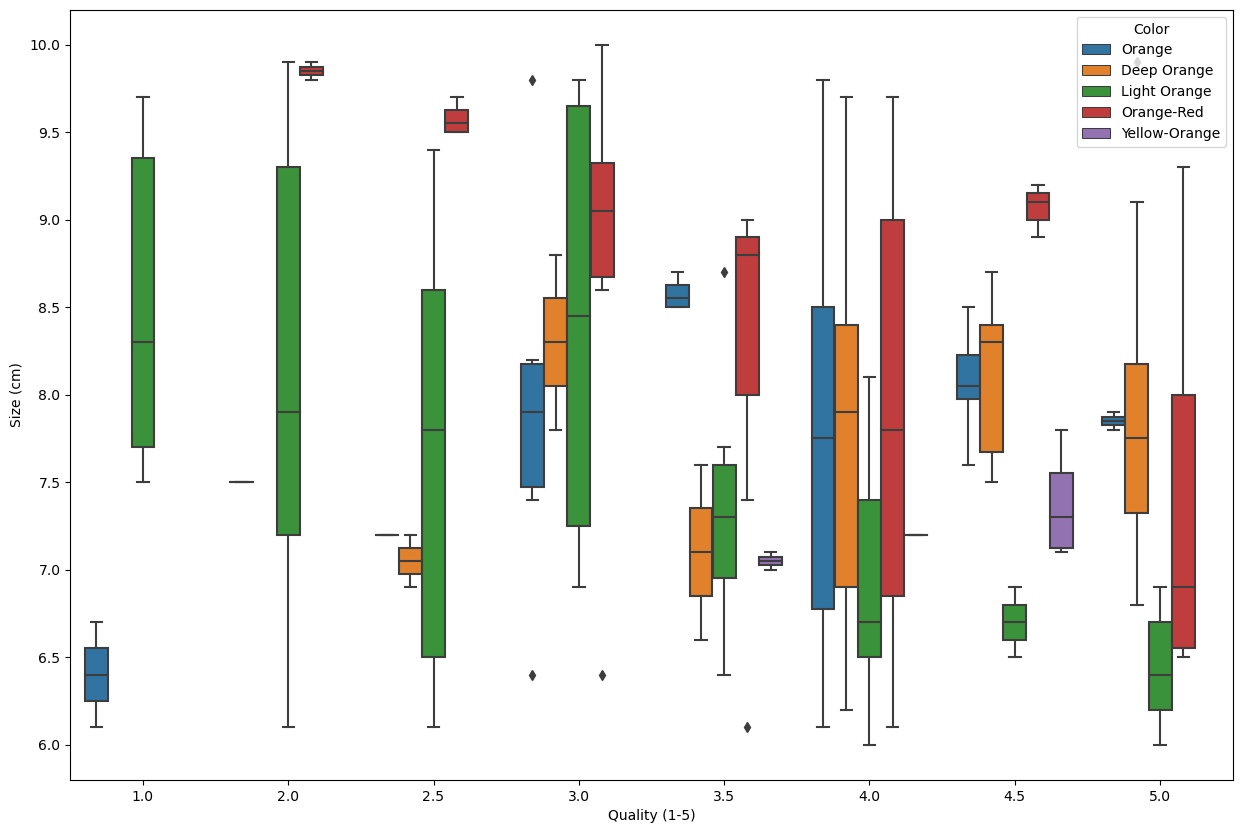

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Quality (1-5)',y='Size (cm)',hue='Color')
plt.show()

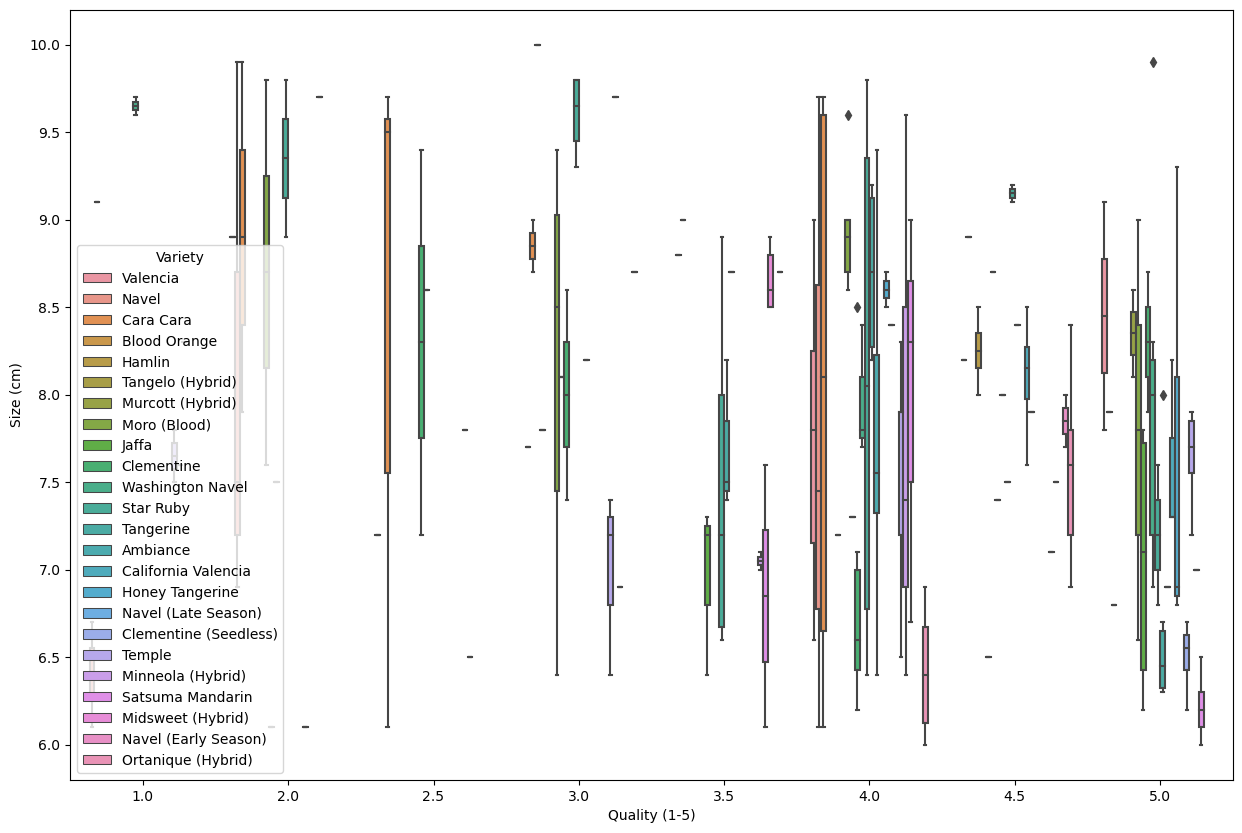

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Quality (1-5)',y='Size (cm)',hue='Variety')
plt.show()

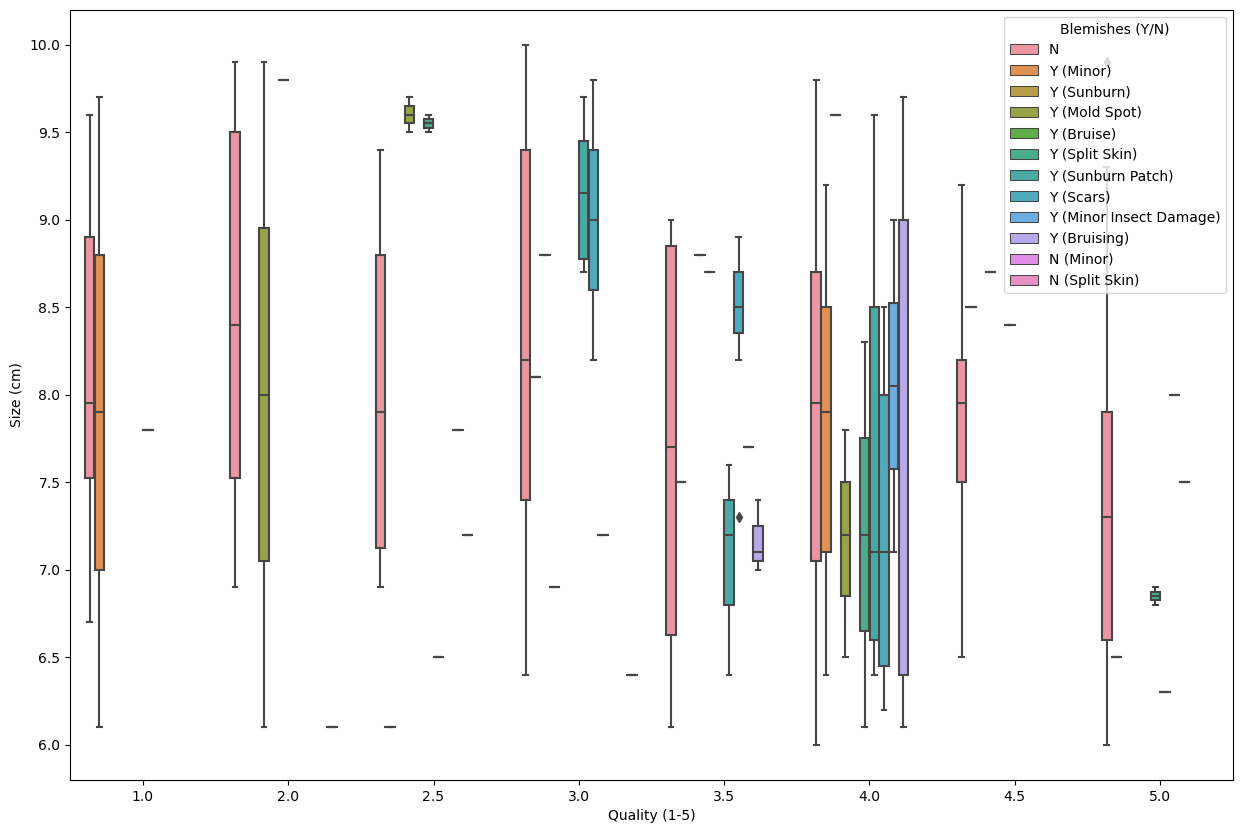

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Quality (1-5)',y='Size (cm)',hue='Blemishes (Y/N)')
plt.show()

<Axes: xlabel='Color', ylabel='count'>

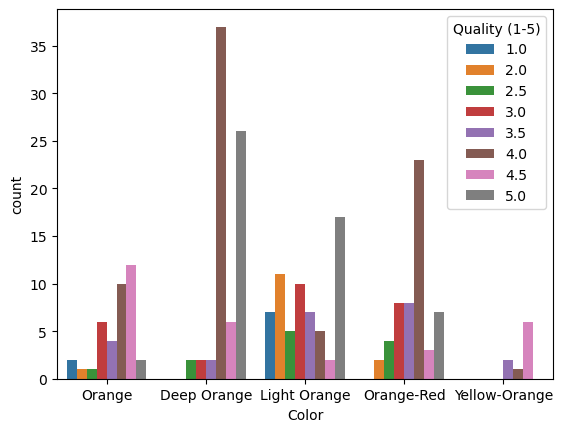

In [21]:
sns.countplot(data=df,x='Color',hue='Quality (1-5)')

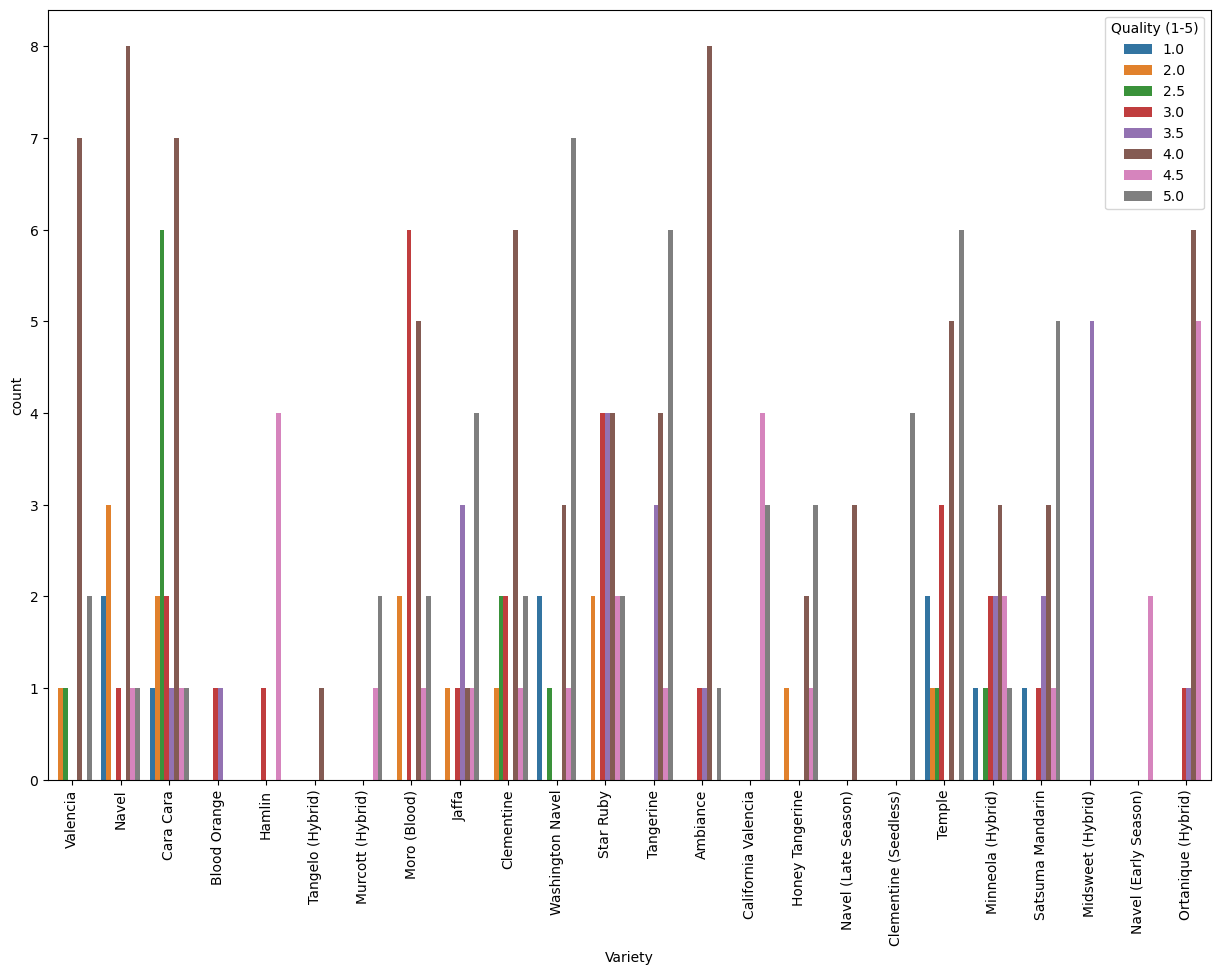

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Variety',hue='Quality (1-5)')
plt.xticks(rotation=90)
plt.show()

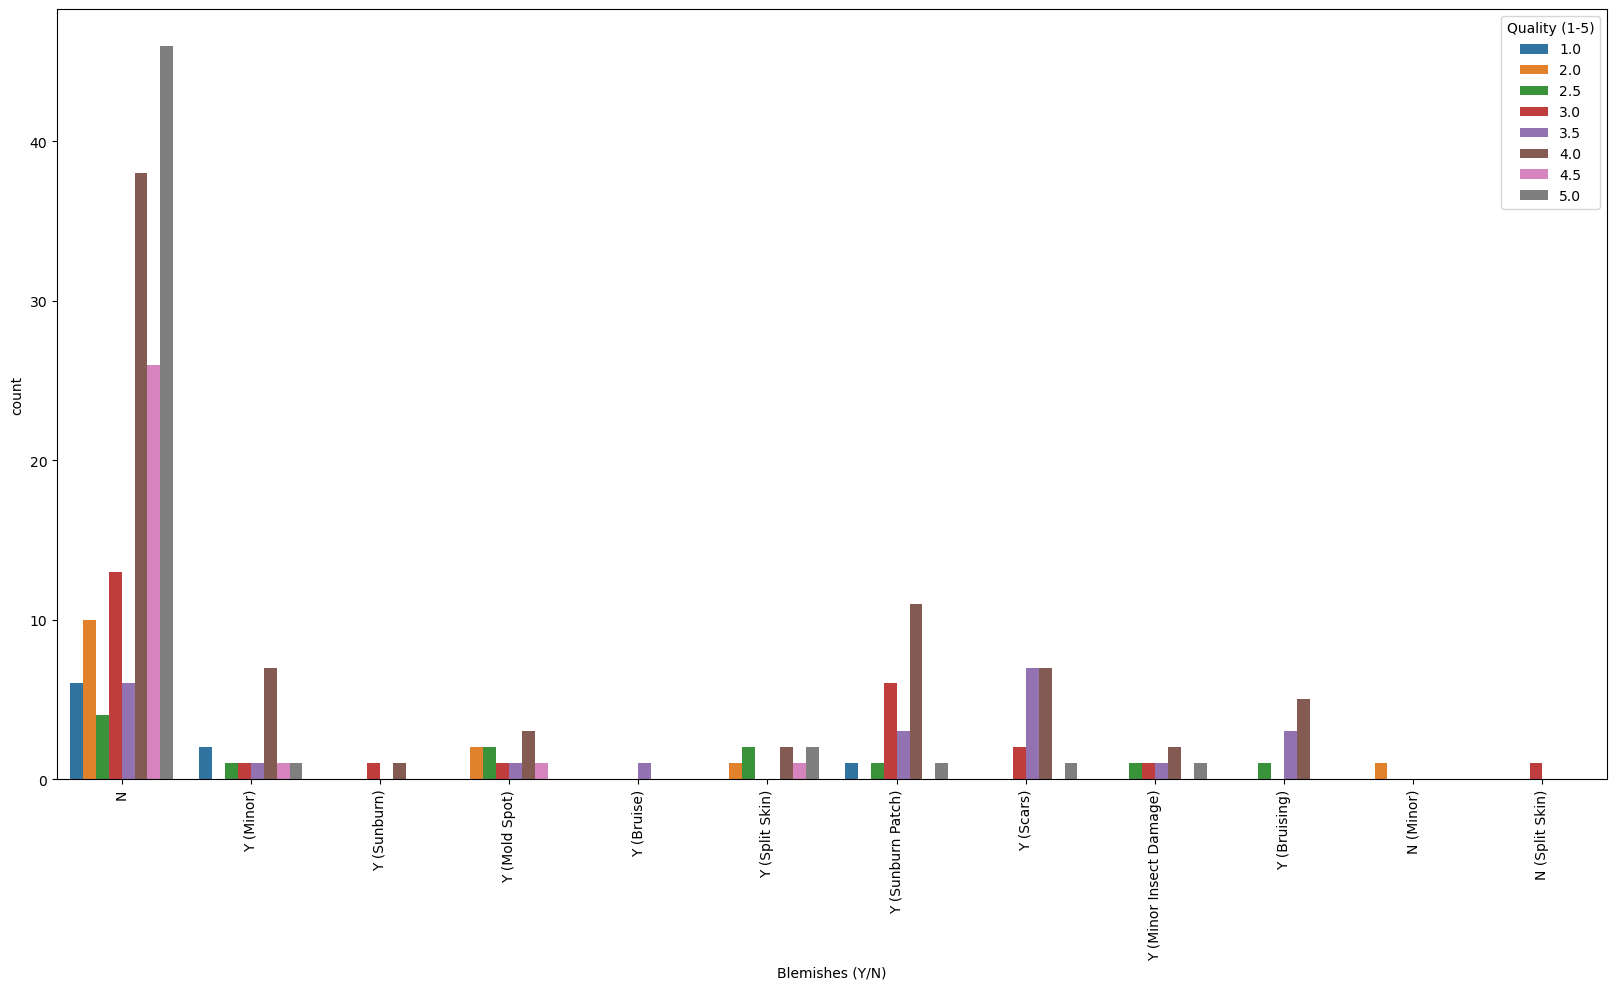

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Blemishes (Y/N)',hue='Quality (1-5)')
plt.xticks(rotation=90)
plt.show()

In [24]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

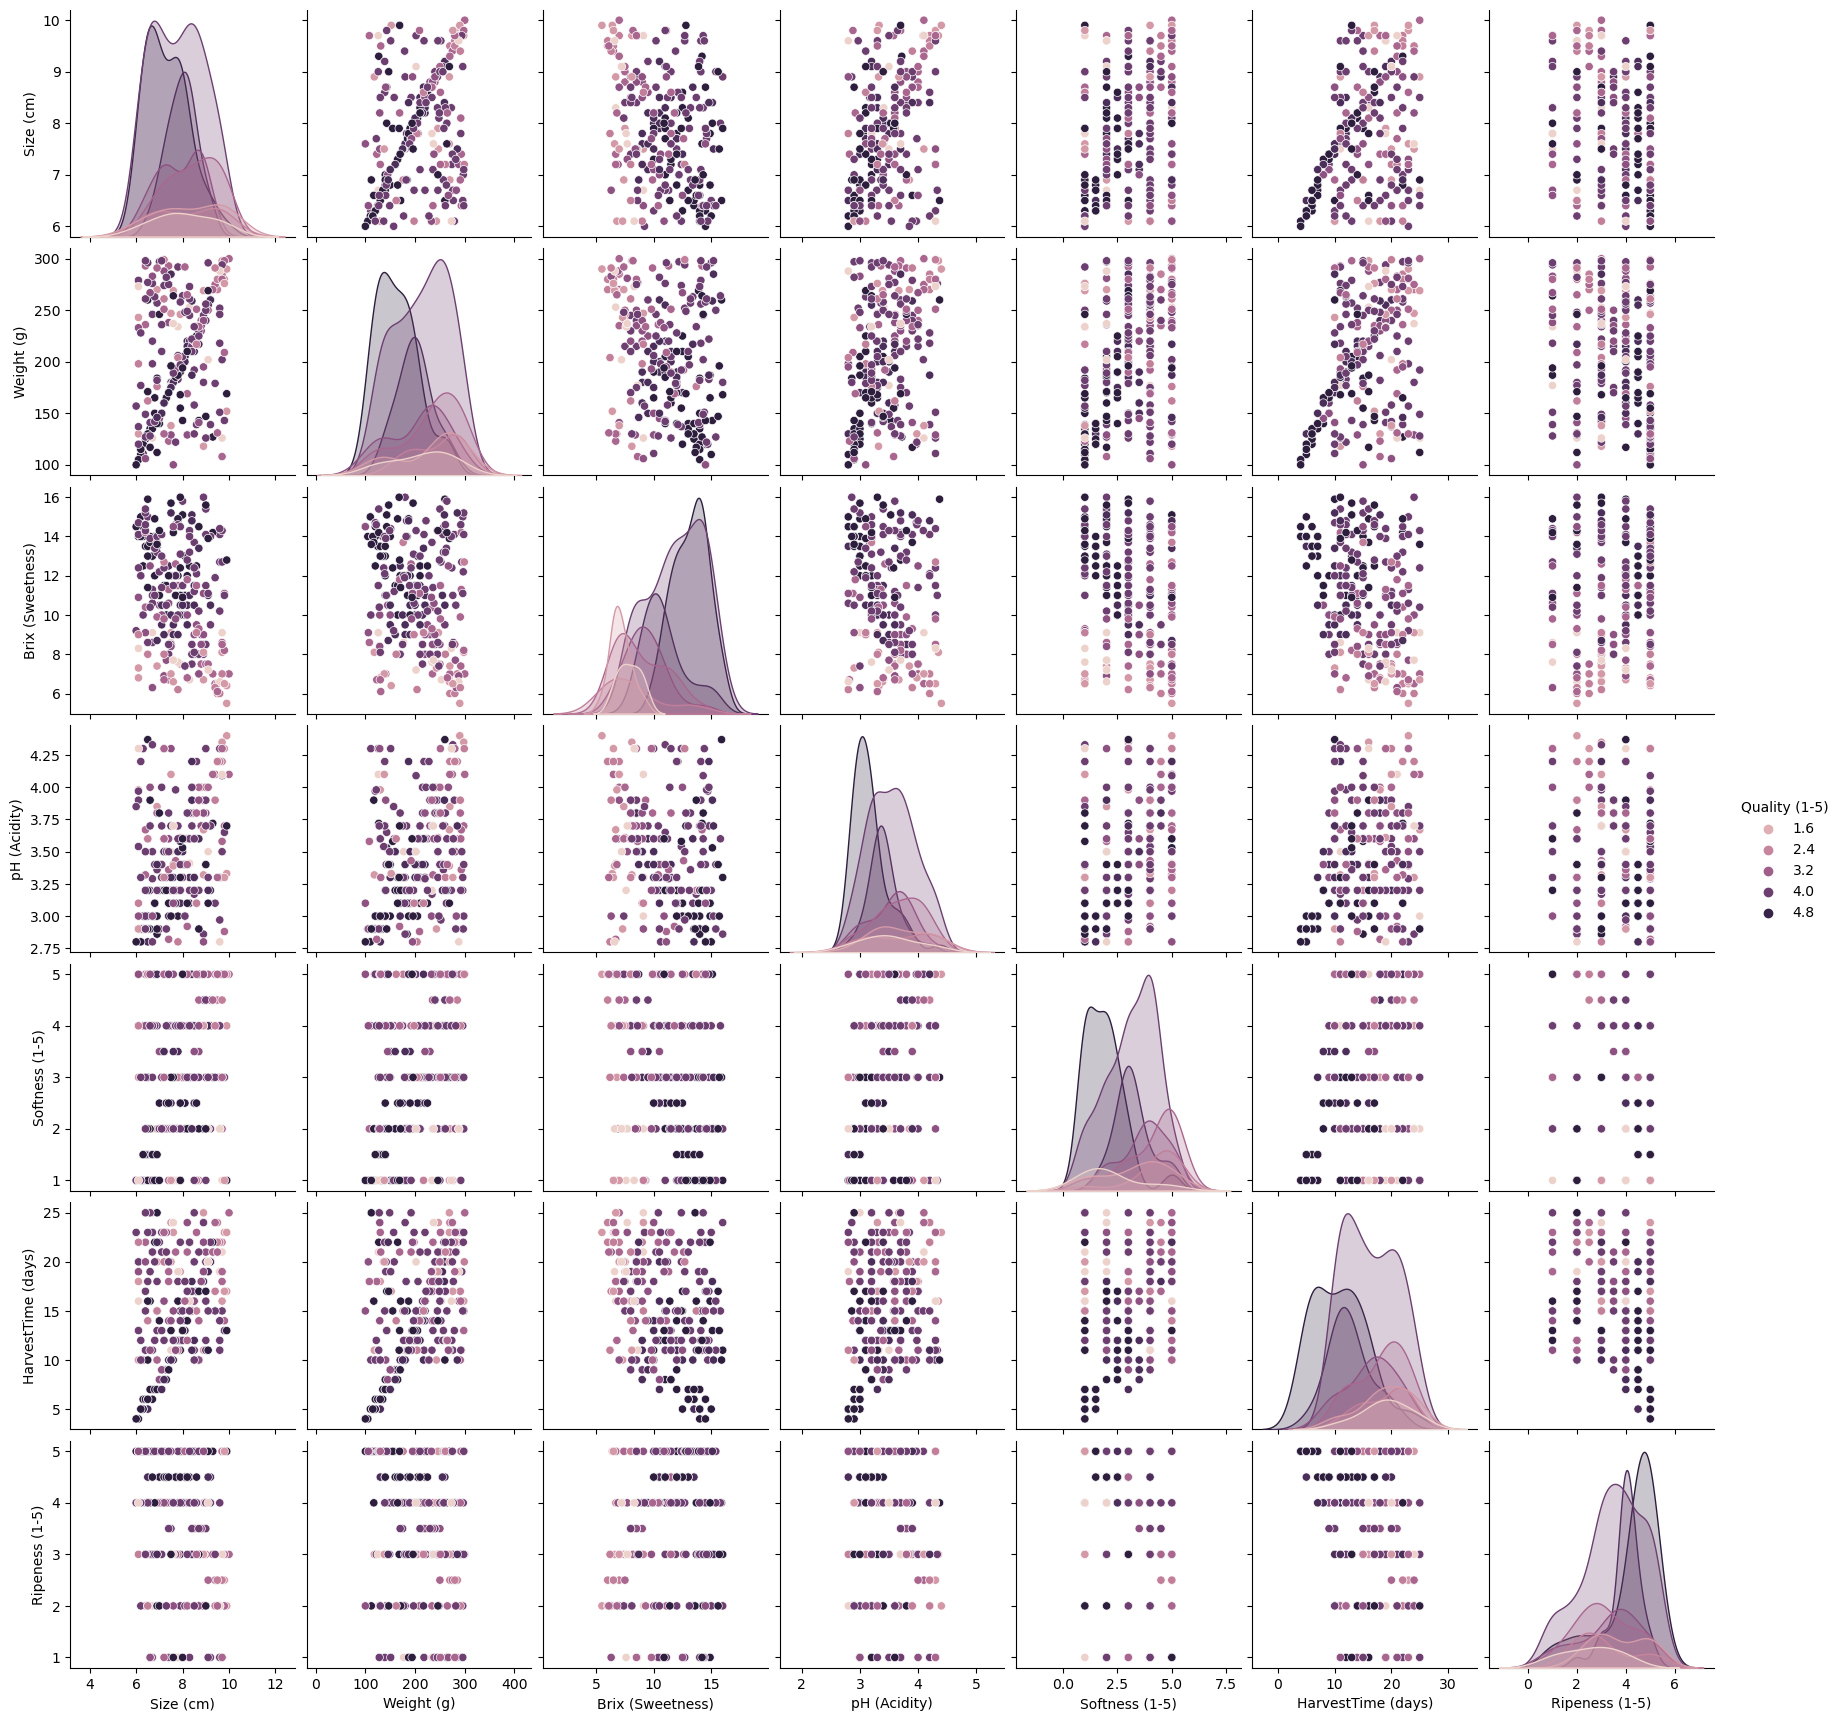

In [25]:
sns.pairplot(data=df,hue='Quality (1-5)')

In [26]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [27]:
object_variables = df.select_dtypes(include=['object'])


In [28]:
object_variables

,Color,Variety,Blemishes (Y/N)
0,Orange,Valencia,N
1,Deep Orange,Navel,N
2,Light Orange,Cara Cara,N
3,Orange-Red,Blood Orange,N
4,Orange,Hamlin,Y (Minor)
...,...,...,...
236,Orange-Red,Tangerine,Y (Scars)
237,Light Orange,Minneola (Hybrid),N
238,Deep Orange,Temple,Y (Minor Insect Damage)
239,Light Orange,Moro (Blood),Y (Minor Insect Damage)


In [29]:
numeric_variables = df.select_dtypes(exclude=['object'])


In [30]:
numeric_variables

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,4.5
...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,3.0


<Axes: >

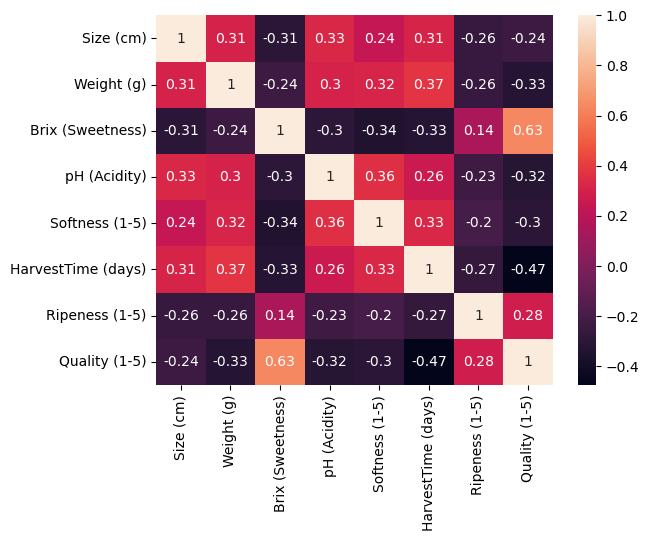

In [31]:
sns.heatmap(numeric_variables.corr(),annot=True)

In [32]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [33]:
label_df=df['Quality (1-5)'].value_counts().index

In [34]:
label_df

Index([4.0, 5.0, 4.5, 3.0, 3.5, 2.0, 2.5, 1.0], dtype='float64', name='Quality (1-5)')

In [35]:
val_df=df['Quality (1-5)'].value_counts().values

In [36]:
val_df

array([76, 52, 29, 26, 23, 14, 12,  9], dtype=int64)

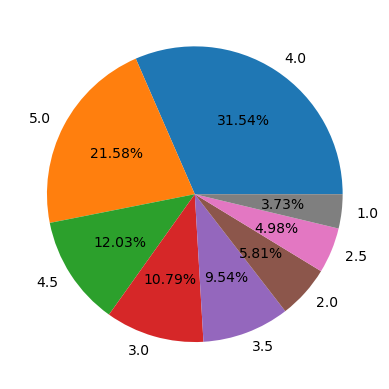

In [37]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [38]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


<Axes: xlabel='Quality (1-5)', ylabel='Weight (g)'>

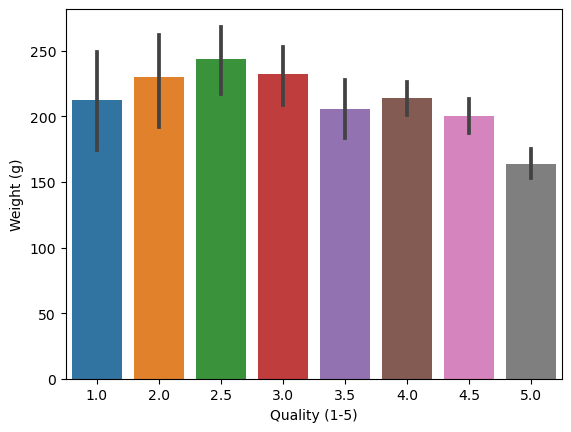

In [39]:
sns.barplot(data=df,x='Quality (1-5)',y='Weight (g)')

<Axes: xlabel='Quality (1-5)', ylabel='Size (cm)'>

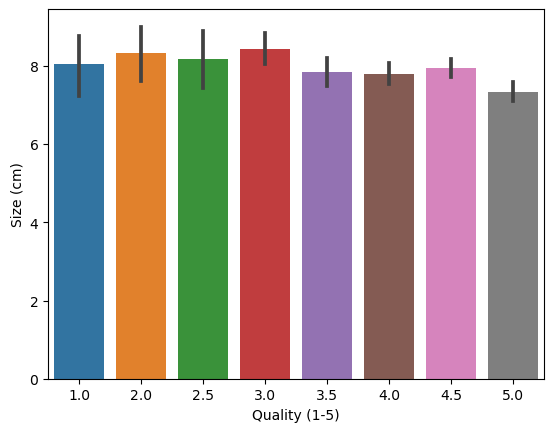

In [40]:
sns.barplot(data=df,x='Quality (1-5)',y='Size (cm)')

<Axes: xlabel='Quality (1-5)', ylabel='Brix (Sweetness)'>

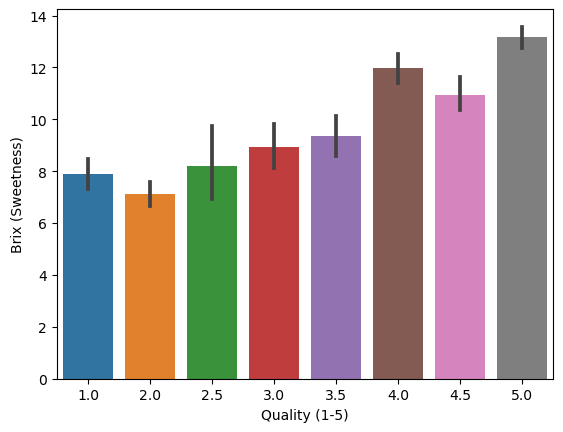

In [41]:
sns.barplot(data=df,x='Quality (1-5)',y='Brix (Sweetness)')

<Axes: xlabel='Quality (1-5)', ylabel='pH (Acidity)'>

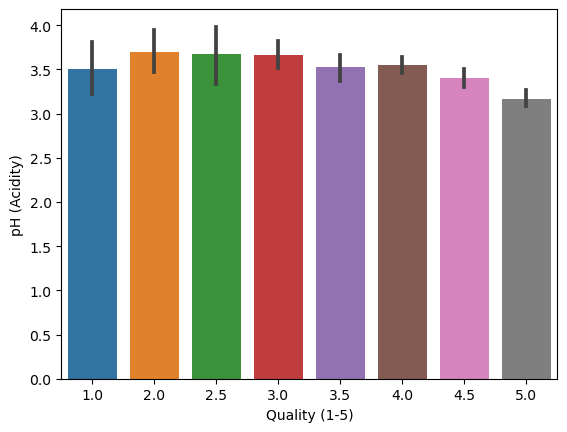

In [42]:

sns.barplot(data=df,x='Quality (1-5)',y='pH (Acidity)')

<Axes: xlabel='Quality (1-5)', ylabel='Softness (1-5)'>

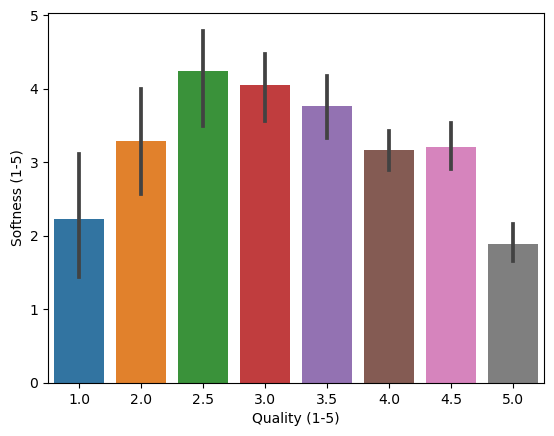

In [43]:
sns.barplot(data=df,x='Quality (1-5)',y='Softness (1-5)')

<Axes: xlabel='Quality (1-5)', ylabel='HarvestTime (days)'>

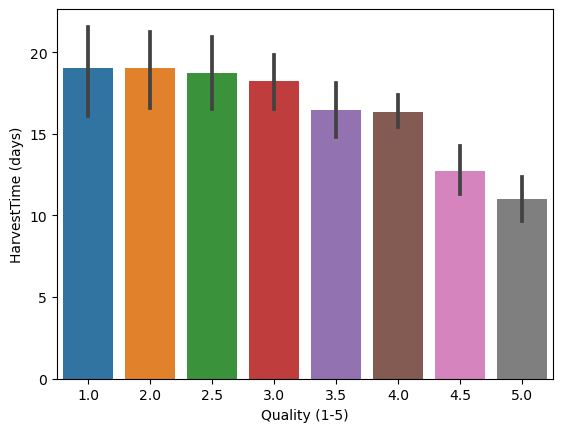

In [44]:
sns.barplot(data=df,x='Quality (1-5)',y='HarvestTime (days)')

<Axes: xlabel='Quality (1-5)', ylabel='Ripeness (1-5)'>

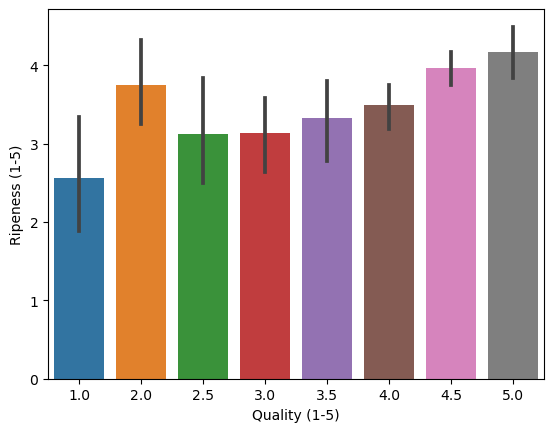

In [45]:
sns.barplot(data=df,x='Quality (1-5)',y='Ripeness (1-5)')

<Axes: xlabel='Quality (1-5)', ylabel='Ripeness (1-5)'>

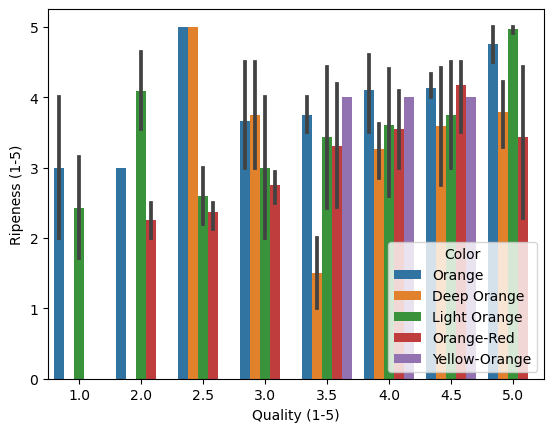

In [46]:
sns.barplot(data=df,x='Quality (1-5)',y='Ripeness (1-5)',hue='Color')

<Axes: xlabel='Quality (1-5)', ylabel='HarvestTime (days)'>

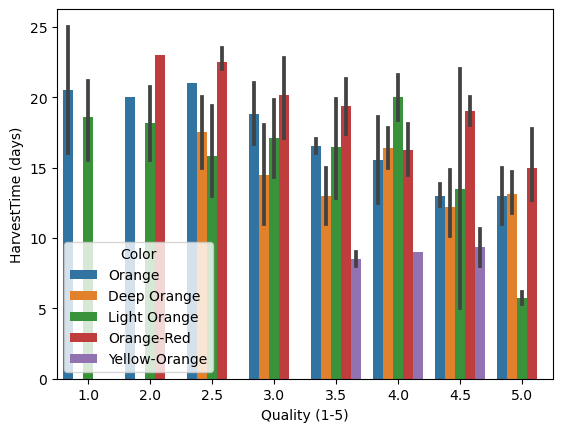

In [47]:
sns.barplot(data=df,x='Quality (1-5)',y='HarvestTime (days)',hue='Color')

<Axes: xlabel='Quality (1-5)', ylabel='Softness (1-5)'>

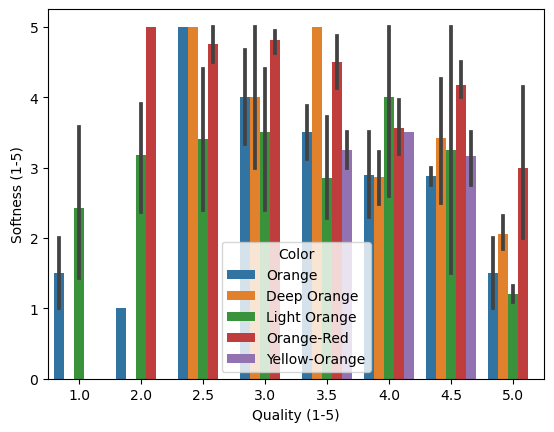

In [48]:
sns.barplot(data=df,x='Quality (1-5)',y='Softness (1-5)',hue='Color')

<Axes: xlabel='Quality (1-5)', ylabel='pH (Acidity)'>

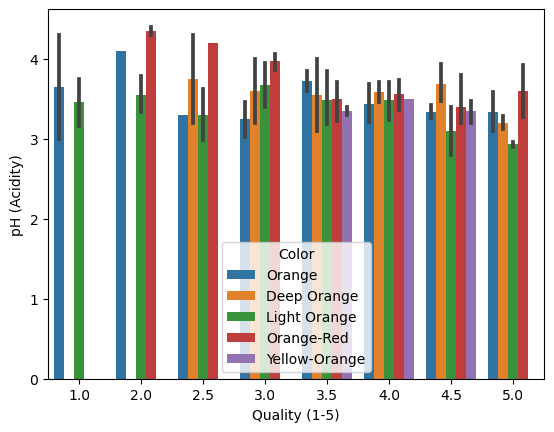

In [49]:
sns.barplot(data=df,x='Quality (1-5)',y='pH (Acidity)',hue='Color')

<Axes: xlabel='Quality (1-5)', ylabel='Brix (Sweetness)'>

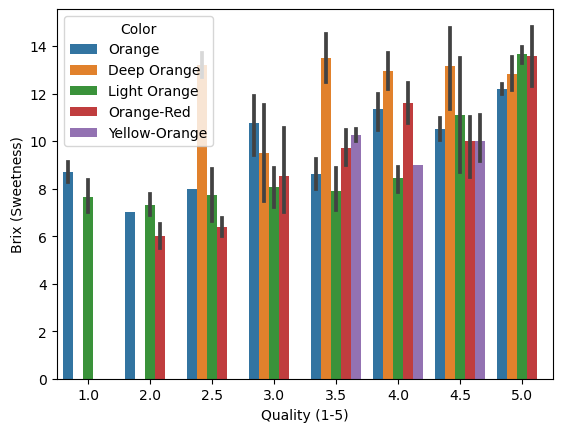

In [50]:
sns.barplot(data=df,x='Quality (1-5)',y='Brix (Sweetness)',hue='Color')

<Axes: xlabel='Quality (1-5)', ylabel='Size (cm)'>

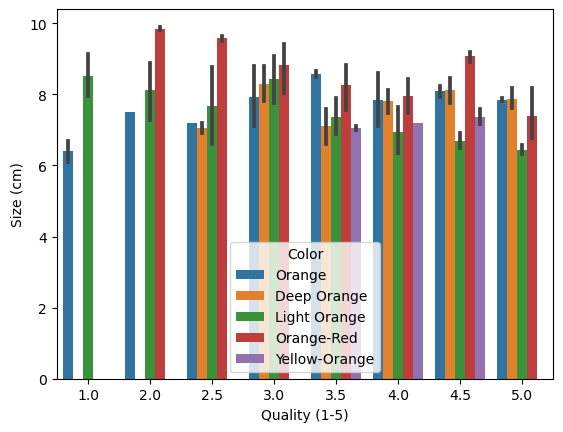

In [51]:
sns.barplot(data=df,x='Quality (1-5)',y='Size (cm)',hue='Color')

<Axes: xlabel='Quality (1-5)', ylabel='Weight (g)'>

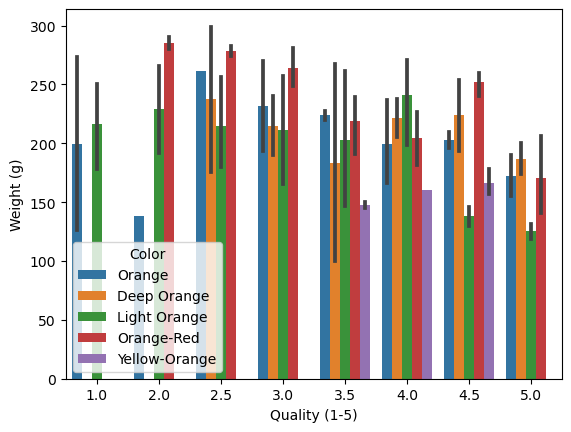

In [52]:
sns.barplot(data=df,x='Quality (1-5)',y='Weight (g)',hue='Color')

In [53]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [54]:
Variety_df=df.groupby("Variety").agg({
    'Weight (g)':"mean",
    'Size (cm)':'max',
    'pH (Acidity)':'min',
    'HarvestTime (days)':'min'
})

In [55]:
Variety_df

,Weight (g),Size (cm),pH (Acidity),HarvestTime (days)
Variety,,,,
Ambiance,198.000000,9.4,2.86,9
Blood Orange,275.000000,10.0,3.80,21
California Valencia,192.857143,8.5,3.10,8
Cara Cara,227.095238,9.9,2.90,7
Clementine,225.000000,9.4,2.82,11
Clementine (Seedless),130.000000,6.7,2.90,5
Hamlin,207.000000,8.5,3.20,11
Honey Tangerine,185.571429,9.3,2.90,7
Jaffa,200.909091,8.1,2.90,5


In [56]:
Variety_df.sort_values(by="Size (cm)",inplace=True)

In [57]:
Variety_df

,Weight (g),Size (cm),pH (Acidity),HarvestTime (days)
Variety,,,,
Clementine (Seedless),130.000000,6.7,2.90,5
Tangelo (Hybrid),160.000000,7.2,3.50,9
Navel (Early Season),192.500000,8.0,3.10,11
Jaffa,200.909091,8.1,2.90,5
Navel (Late Season),213.333333,8.4,3.70,15
California Valencia,192.857143,8.5,3.10,8
Hamlin,207.000000,8.5,3.20,11
Murcott (Hybrid),186.666667,8.6,2.80,5
Ortanique (Hybrid),191.769231,8.7,3.36,8


In [58]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [59]:
le=LabelEncoder()


In [60]:
df['Color']=le.fit_transform(df['Color'])


In [61]:
df['Variety']=le.fit_transform(df['Variety'])


In [62]:
df['Blemishes (Y/N)']=le.fit_transform(df['Blemishes (Y/N)'])

In [63]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,3.0


<Axes: >

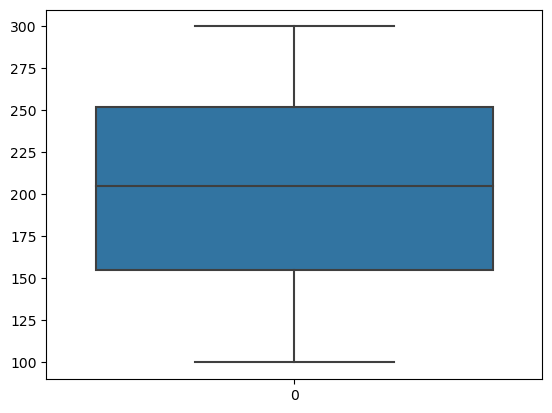

In [64]:
sns.boxplot(df['Weight (g)'])

<Axes: >

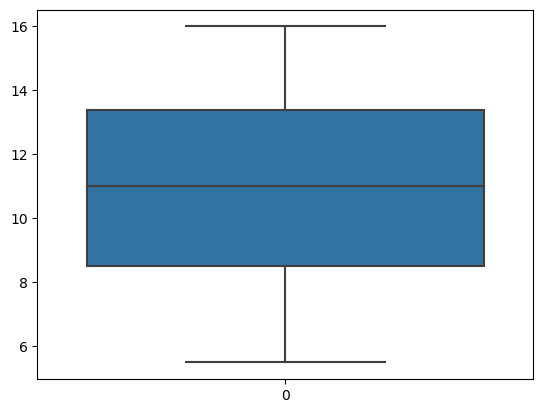

In [65]:
sns.boxplot(df['Brix (Sweetness)'])

<Axes: >

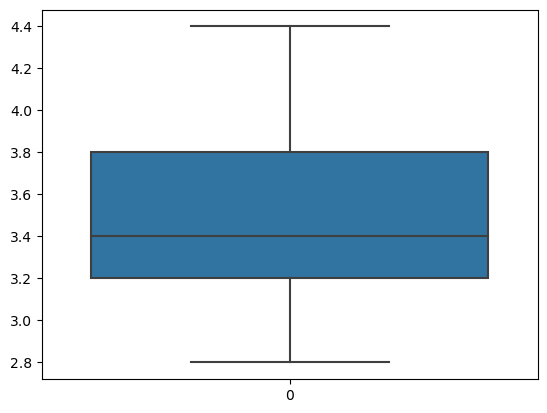

In [66]:
sns.boxplot(df['pH (Acidity)'])

<Axes: >

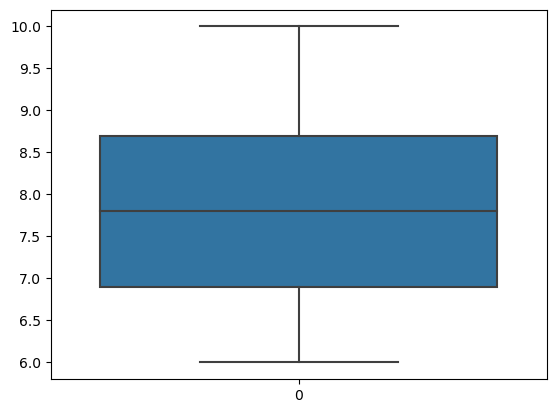

In [67]:
sns.boxplot(df['Size (cm)'])

<Axes: >

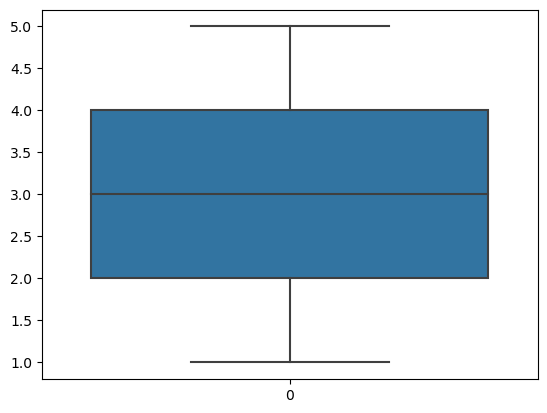

In [68]:
sns.boxplot(df['Softness (1-5)'])

<Axes: >

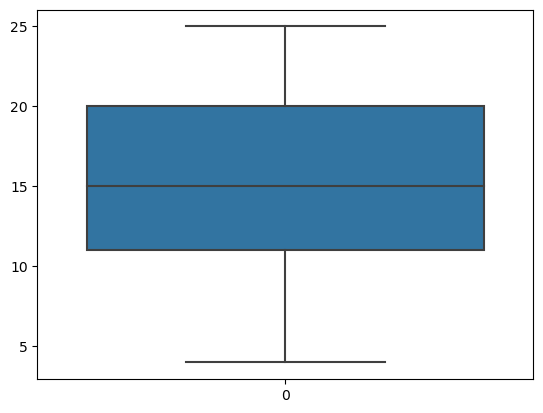

In [69]:
sns.boxplot(df['HarvestTime (days)'])

<Axes: >

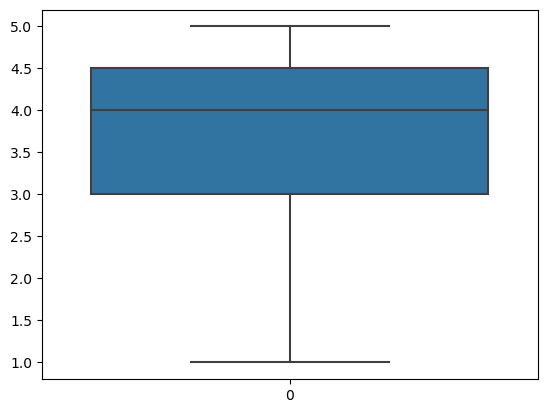

In [70]:
sns.boxplot(df['Ripeness (1-5)'])

<Axes: >

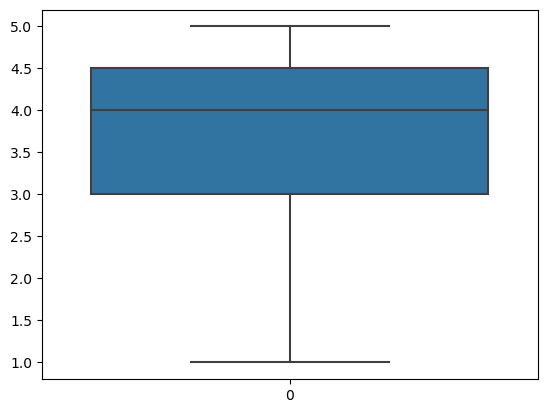

In [71]:
sns.boxplot(df['Quality (1-5)'])

In [72]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,3.0


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Quality (1-5)', ylabel='Count'>

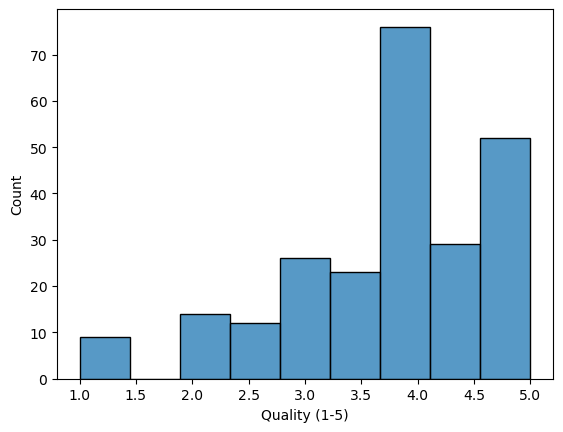

In [73]:
sns.histplot(data=df,x='Quality (1-5)')

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Size (cm)', ylabel='Count'>

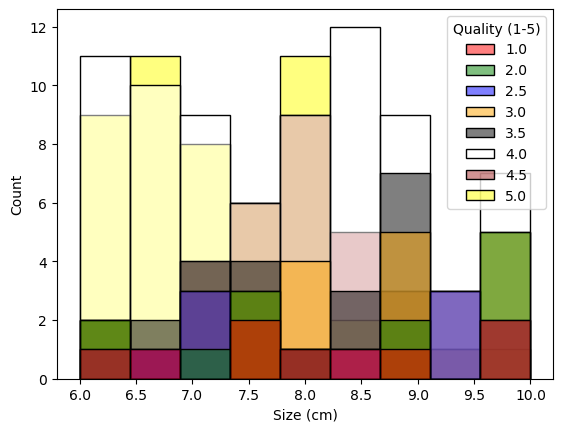

In [74]:
sns.histplot(data=df,x='Size (cm)',hue='Quality (1-5)',
             palette=['red','green','blue','orange','black','white','brown','yellow'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight (g)', ylabel='Count'>

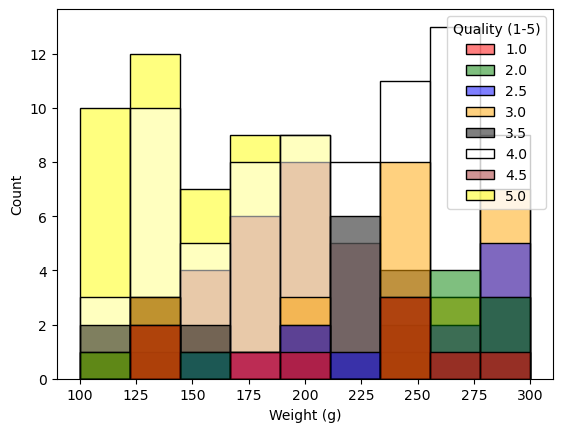

In [75]:
sns.histplot(data=df,x='Weight (g)',hue='Quality (1-5)',
             palette=['red','green','blue','orange','black','white','brown','yellow'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Brix (Sweetness)', ylabel='Count'>

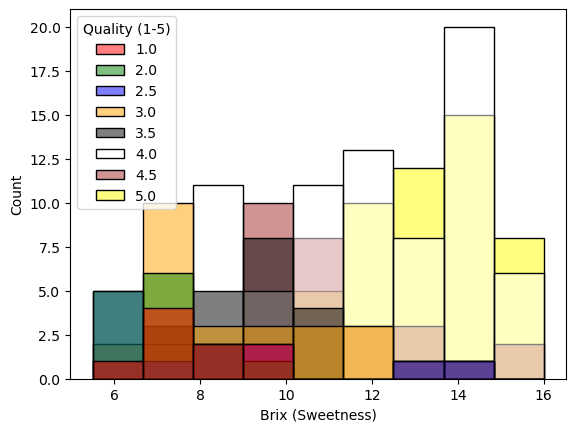

In [76]:
sns.histplot(data=df,x='Brix (Sweetness)',hue='Quality (1-5)',
             palette=['red','green','blue','orange','black','white','brown','yellow'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pH (Acidity)', ylabel='Count'>

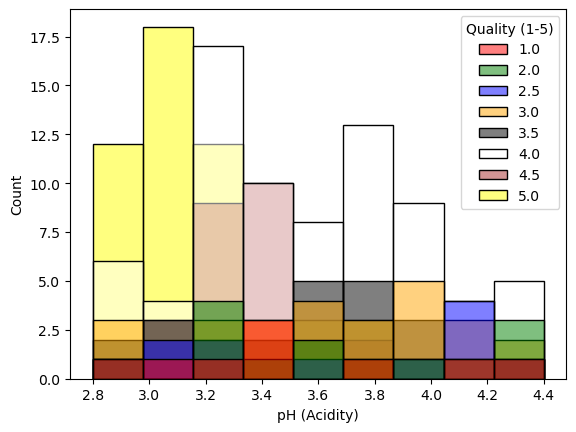

In [77]:

sns.histplot(data=df,x='pH (Acidity)',hue='Quality (1-5)',
             palette=['red','green','blue','orange','black','white','brown','yellow'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Softness (1-5)', ylabel='Count'>

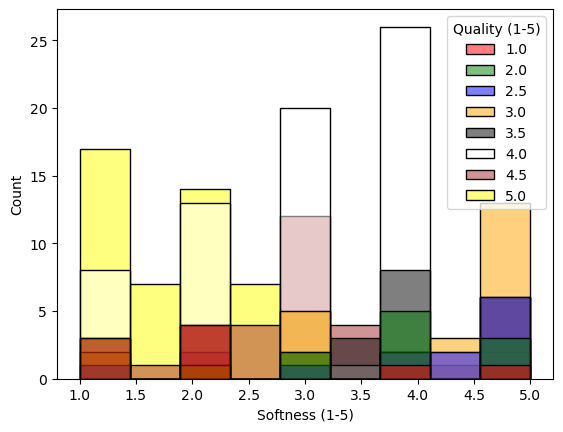

In [78]:
sns.histplot(data=df,x='Softness (1-5)',hue='Quality (1-5)',
             palette=['red','green','blue','orange','black','white','brown','yellow'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HarvestTime (days)', ylabel='Count'>

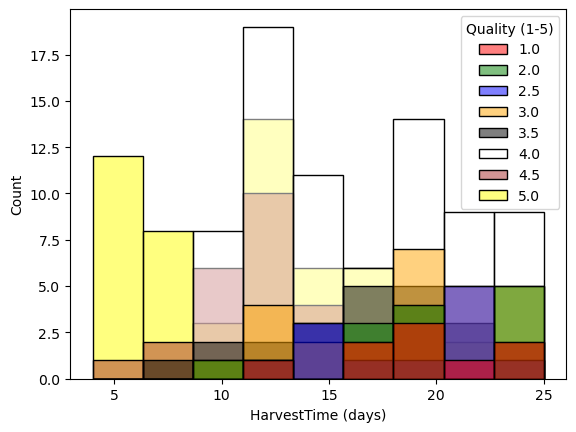

In [79]:

sns.histplot(data=df,x='HarvestTime (days)',hue='Quality (1-5)',
             palette=['red','green','blue','orange','black','white','brown','yellow'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ripeness (1-5)', ylabel='Count'>

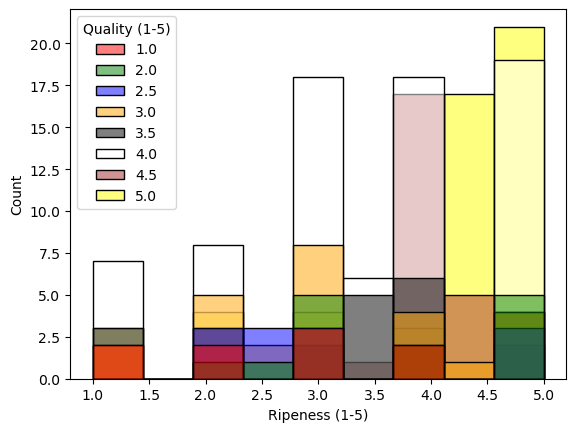

In [80]:
sns.histplot(data=df,x='Ripeness (1-5)',hue='Quality (1-5)',
             palette=['red','green','blue','orange','black','white','brown','yellow'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Variety', ylabel='Count'>

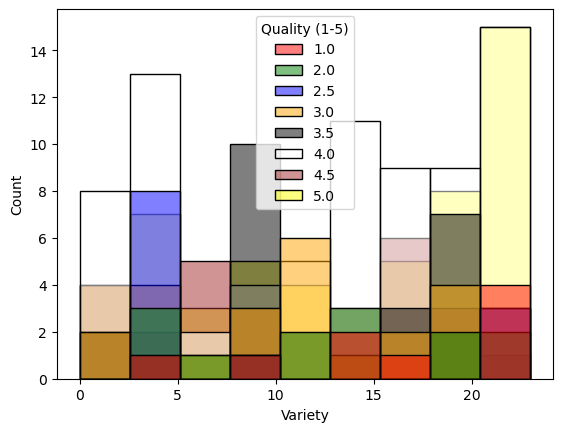

In [81]:

sns.histplot(data=df,x='Variety',hue='Quality (1-5)',
             palette=['red','green','blue','orange','black','white','brown','yellow'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Blemishes (Y/N)', ylabel='Count'>

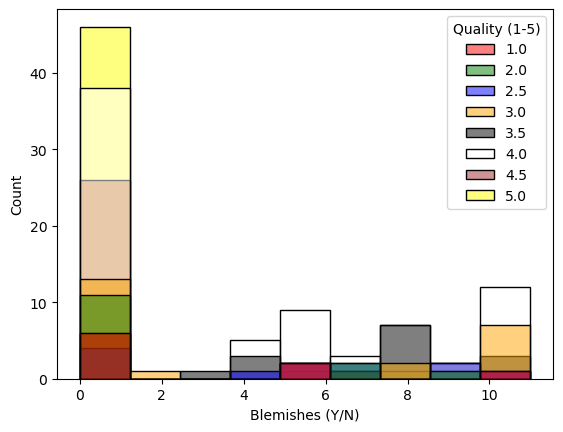

In [82]:
sns.histplot(data=df,x='Blemishes (Y/N)',hue='Quality (1-5)',
             palette=['red','green','blue','orange','black','white','brown','yellow'])

In [83]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,3.0


C:\Users\himan\AppData\Local\Temp\ipykernel_21788\617669697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size (cm)'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Size (cm)', ylabel='Density'>

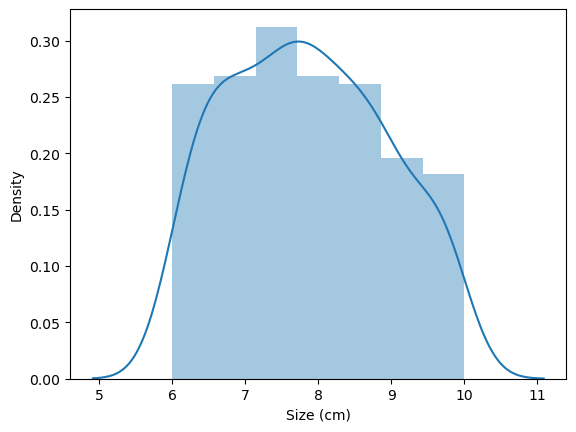

In [84]:
sns.distplot(df['Size (cm)'])

C:\Users\himan\AppData\Local\Temp\ipykernel_21788\349969733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight (g)'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight (g)', ylabel='Density'>

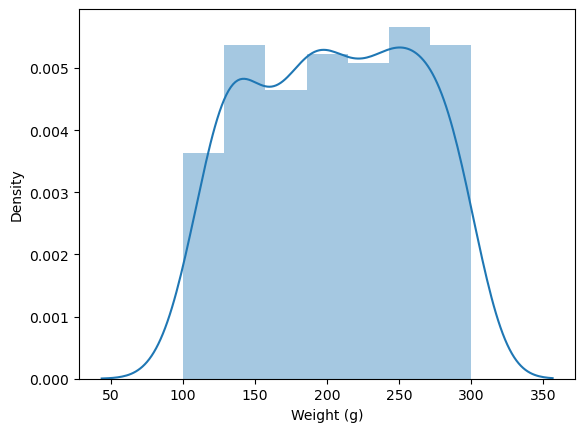

In [85]:
sns.distplot(df['Weight (g)'])


C:\Users\himan\AppData\Local\Temp\ipykernel_21788\3975893891.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Brix (Sweetness)'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Brix (Sweetness)', ylabel='Density'>

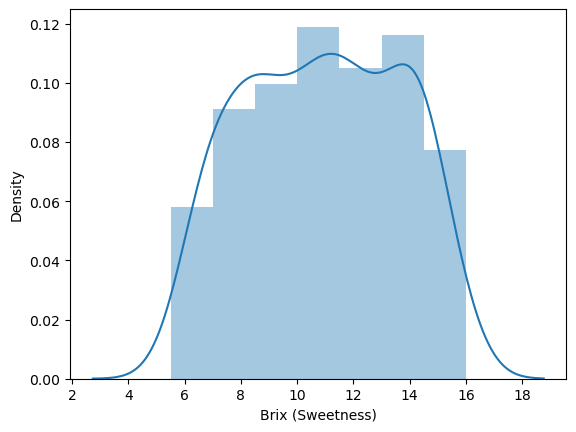

In [86]:
sns.distplot(df['Brix (Sweetness)'])

C:\Users\himan\AppData\Local\Temp\ipykernel_21788\1617231659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pH (Acidity)'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pH (Acidity)', ylabel='Density'>

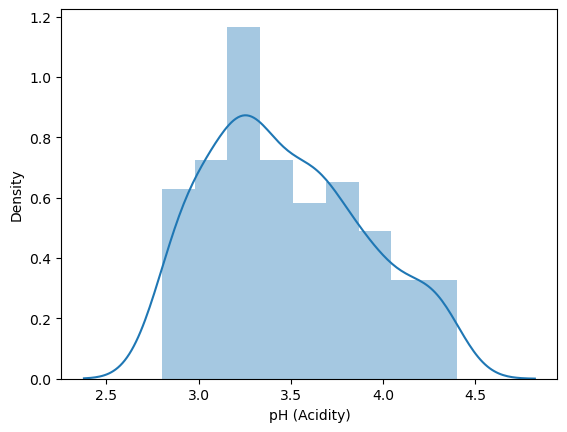

In [87]:
sns.distplot(df['pH (Acidity)'])

C:\Users\himan\AppData\Local\Temp\ipykernel_21788\2002026348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Softness (1-5)'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Softness (1-5)', ylabel='Density'>

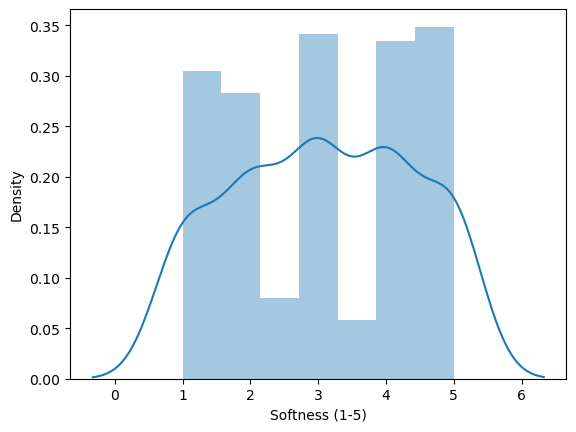

In [88]:
sns.distplot(df['Softness (1-5)'])

C:\Users\himan\AppData\Local\Temp\ipykernel_21788\3661913260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HarvestTime (days)'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HarvestTime (days)', ylabel='Density'>

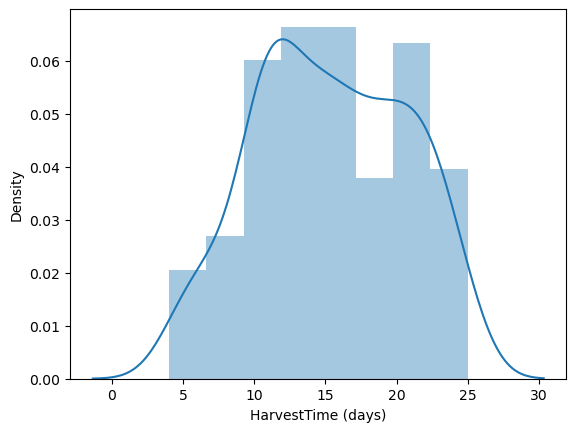

In [89]:
sns.distplot(df['HarvestTime (days)'])

C:\Users\himan\AppData\Local\Temp\ipykernel_21788\3009635817.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ripeness (1-5)'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ripeness (1-5)', ylabel='Density'>

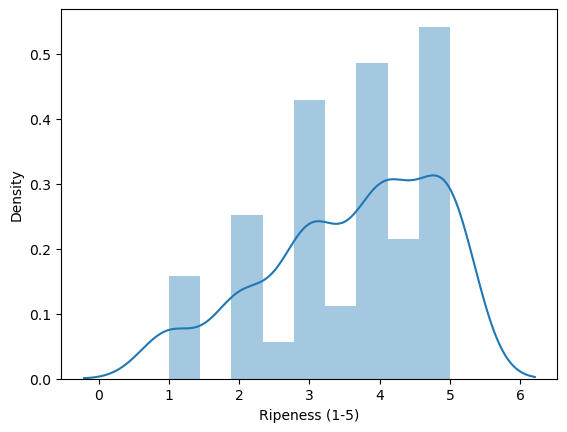

In [90]:
sns.distplot(df['Ripeness (1-5)'])

C:\Users\himan\AppData\Local\Temp\ipykernel_21788\3838101766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Variety'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Variety', ylabel='Density'>

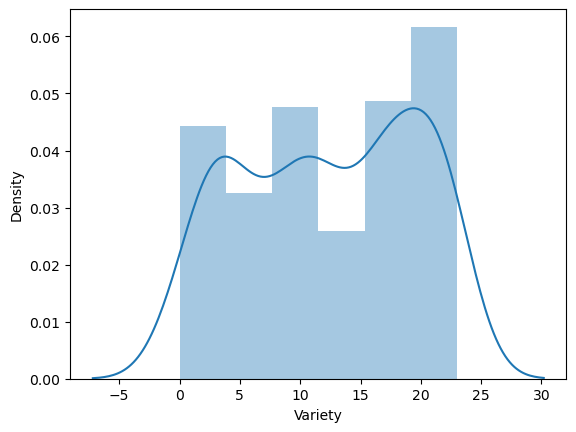

In [91]:
sns.distplot(df['Variety'])

C:\Users\himan\AppData\Local\Temp\ipykernel_21788\3017103975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Color'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Color', ylabel='Density'>

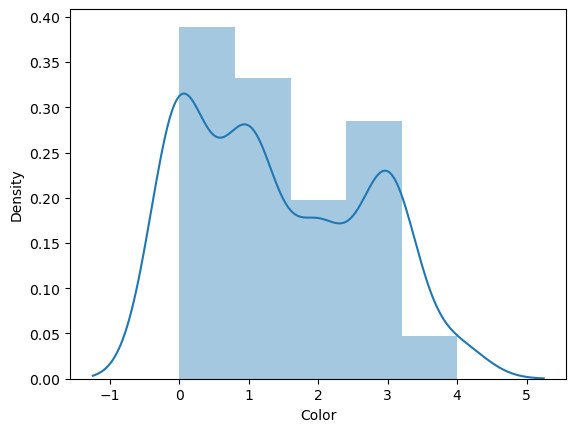

In [92]:
sns.distplot(df['Color'])

In [93]:
X=df.drop(['Quality (1-5)'],axis=1)

In [94]:
X

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6
...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5


In [95]:
y=df['Quality (1-5)']

In [96]:
y

0      4.0
1      4.5
2      5.0
3      3.5
4      4.5
      ... 
236    5.0
237    4.0
238    5.0
239    3.0
240    4.0
Name: Quality (1-5), Length: 241, dtype: float64

In [97]:
sc=StandardScaler()


In [98]:
X=sc.fit_transform(X)


In [99]:
X

array([[-0.31816786, -0.44598789,  0.3964537 , ...,  0.47059122,
         1.34884942, -0.73370704],
       [ 0.3277397 ,  0.26393999, -0.14806762, ..., -1.13809651,
         0.09212502, -0.73370704],
       [-0.96407542, -0.9784338 ,  1.12248213, ..., -0.33375264,
        -1.30423541, -0.73370704],
       ...,
       [-0.31816786, -0.16201674,  1.73960629, ..., -1.13809651,
         1.20921338,  0.55509323],
       [-0.59498538,  0.8141341 , -0.40217757, ..., -0.33375264,
        -0.18714706,  0.55509323],
       [-0.50271288,  1.36432821, -0.14806762, ...,  1.27493509,
        -0.6060552 ,  0.81285329]])

In [100]:
type(X)

numpy.ndarray

In [101]:
rf_regressor=RandomForestRegressor()


In [102]:
# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [104]:
X_train.shape

(192, 10)

In [105]:
X_test.shape

(49, 10)

In [106]:
y_train.shape

(192,)

In [107]:
y_test.shape

(49,)

In [108]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Predict on test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate MSE on test data
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (MSE): 0.4355392459728522
Mean Squared Error on Test Data: 0.3819568801206439


In [109]:
r2_score(y_test,y_pred)

0.4872359691531082